<a href="https://colab.research.google.com/github/rahiakela/edureka-deep-learning-with-tensorflow/blob/module-5-convolutional-neural-networks/module_5_assignment_convolutional_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 5: Convolutional Neural Networks

**Implement convolutional neural-network (CNN) for MNIST Dataset**

Network architecture - CNN with 4 layers has following architecture.

* Input layer : 784 nodes (MNIST images size)
* First convolution layer : 5x5x32
* First max-pooling layer
* Second convolution layer : 5x5x64
* Second max-pooling layer
* Third fully-connected layer : 1024 nodes
* Output layer : 10 nodes (number of class for MNIST)

## Setup

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras import backend as keras_backend
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.constraints import max_norm
from keras.optimizers import Adam, SGD, RMSprop
from keras.preprocessing.image import ImageDataGenerator

keras_backend.set_image_data_format('channels_last')

Using TensorFlow backend.


## Load and prepare dataset

In [2]:
random_seed = 42
np.random.seed(random_seed)

# load MNIST data and save sizes
(X_train, y_train), (X_test, y_test) = mnist.load_data()
image_height = X_train.shape[1]
image_width = X_train.shape[2]
number_of_pixels = image_height * image_width

# convert to floating-point
X_train = keras_backend.cast_to_floatx(X_train)
X_test = keras_backend.cast_to_floatx(X_test)

# scale data to range [-1, 1]
X_train = np.interp(X_train, [0, 255], [-1,1])
X_test = np.interp(X_test, [0, 255], [-1,1])

# save original y_train and y_test
original_y_train = y_train
original_y_test = y_test

# replace label data with one-hot encoded versions
number_of_classes = 1 + max(np.append(y_train, y_test))
y_train = to_categorical(y_train, num_classes=number_of_classes)
y_test = to_categorical(y_test, num_classes=number_of_classes)

# reshape sample data to 4D tensor using channels_last convention 
X_train = X_train.reshape(X_train.shape[0], image_height, image_width, 1)
X_test = X_test.reshape(X_test.shape[0], image_height, image_width, 1)

11493376/11490434 [==============================] - 1s 0us/step


## Create and train CNN model

In [0]:
# define the model
def make_cnn_model():
  model = Sequential()
  model.add(Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(image_height, image_width, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (5, 5), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(1024, activation='relu'))
  model.add(Dense(number_of_classes, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

In [4]:
# create the model and print it structure
cnn_model = make_cnn_model()
cnn_model.summary()







Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1639424   
_________________________________________________________________
dense_2 (Dense)              (None, 10)         

In [5]:
# train the model
cnn_history = cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=256)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/100





60000/60000 [==============================] - 18s 295us/step - loss: 0.1832 - acc: 0.9464 - val_loss: 0.0480 - val_acc: 0.9844
Epoch 2/100
60000/60000 [==============================] - 3s 42us/step - loss: 0.0439 - acc: 0.9864 - val_loss: 0.0343 - val_acc: 0.9886
Epoch 3/100
60000/60000 [==============================] - 3s 42us/step - loss: 0.0285 - acc: 0.9908 - val_loss: 0.0275 - val_acc: 0.9905
Epoch 4/100
60000/60000 [==============================] - 3s 42us/step - loss: 0.0210 - acc: 0.9935 - val_loss: 0.0235 - val_acc: 0.9915
Epoch 5/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.0178 - acc: 0.9942 - val_loss: 0.0277 - val_acc: 0.9907
Epoch 6/100
60000/60000 [==============================] - 3s 42us/step - loss: 0.0130 - acc: 0.9959 - val_loss: 0.0288 - val_acc: 0.9903
Epoch 7/100
60000/

In [0]:
# A little utility to draw accuracy and loss plots
def plot_accuracy_and_loss(history, plot_title):
    xs = range(len(history.history['acc']))

    plt.figure(figsize=(10,3))
    plt.subplot(1, 2, 1)
    plt.plot(xs, history.history['acc'], label='train')
    plt.plot(xs, history.history['val_acc'], label='validation')
    plt.legend(loc='lower left')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.title(plot_title+', Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(xs, history.history['loss'], label='train')
    plt.plot(xs, history.history['val_loss'], label='validation')
    plt.legend(loc='upper left')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.title(plot_title+', Loss')

    #plt.tight_layout()
    plt.show()

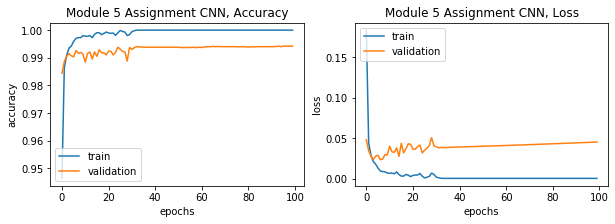

In [11]:
# plot the validation accuracy and loss
plot_accuracy_and_loss(cnn_history, 'Module 5 Assignment CNN')